In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("revenue_prediction.csv")
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [3]:
df = df.drop(['Id', 'Name'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Franchise     100 non-null    object 
 1   Category      100 non-null    object 
 2   City          100 non-null    object 
 3   No_Of_Item    100 non-null    int64  
 4   Order_Placed  100 non-null    float64
 5   Revenue       100 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [5]:
df.isnull().sum()

Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [6]:
# Encoding 'Franchise' and 'Category' columns
label_encoder = LabelEncoder()
df['Franchise'] = label_encoder.fit_transform(df['Franchise'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['City'] = label_encoder.fit_transform(df['City'])

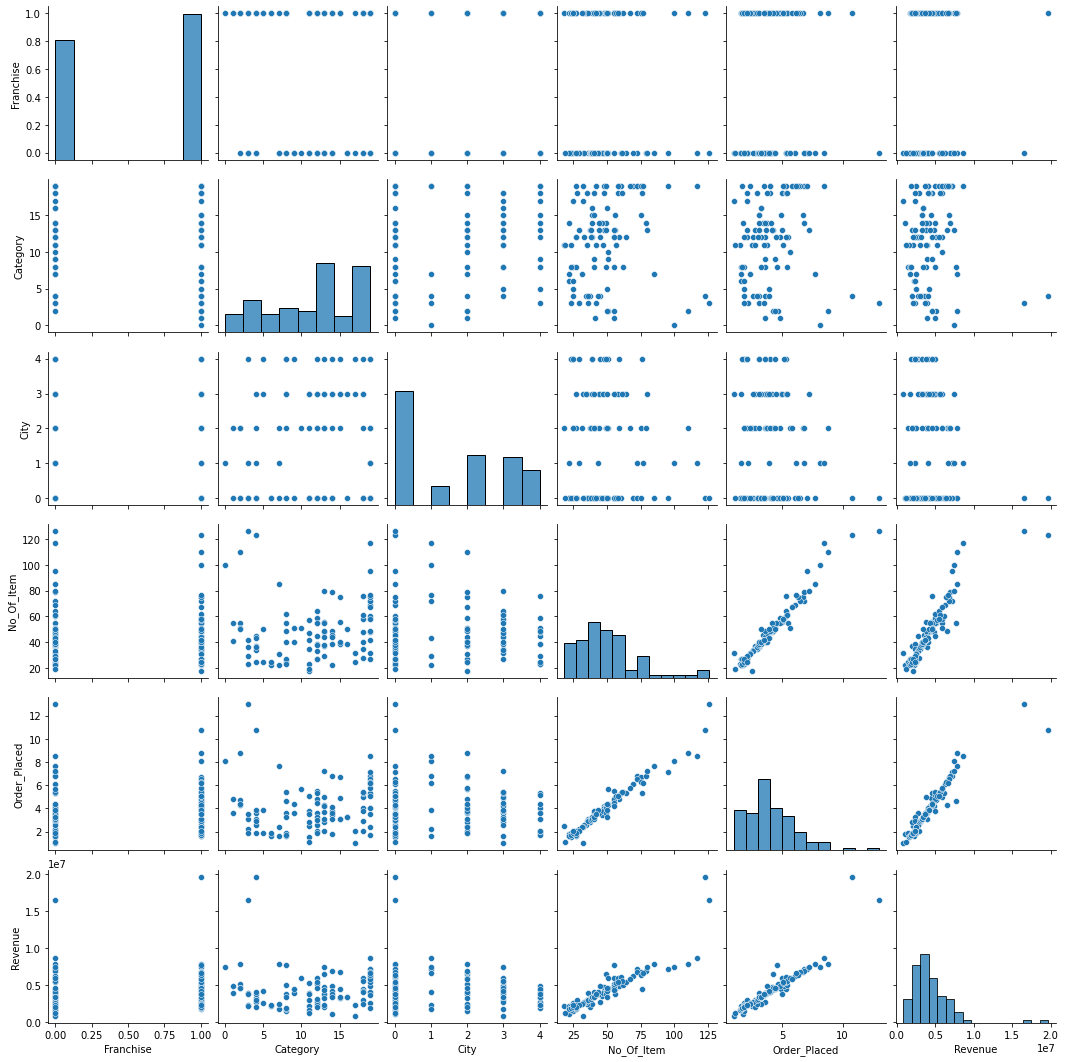

In [7]:
# Pairplot to see relationships
sns.pairplot(df)
plt.show()


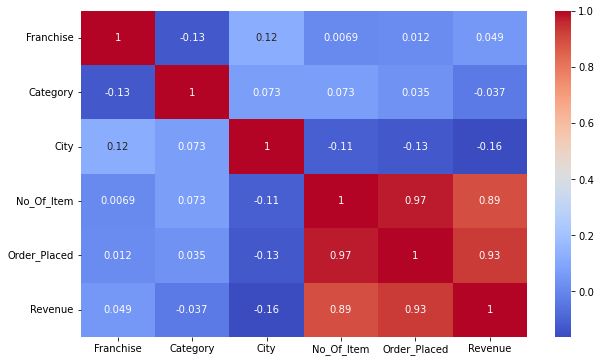

In [8]:
# Heatmap to see correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


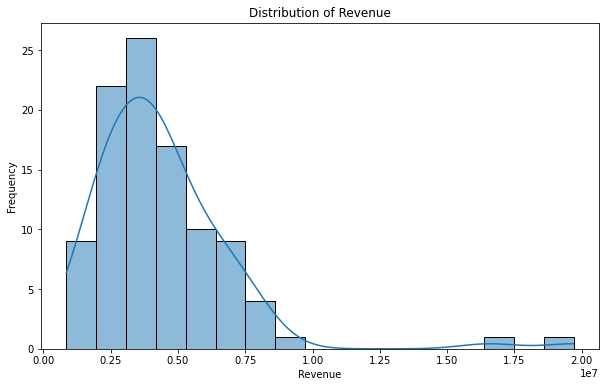

In [9]:
# Distribution of Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


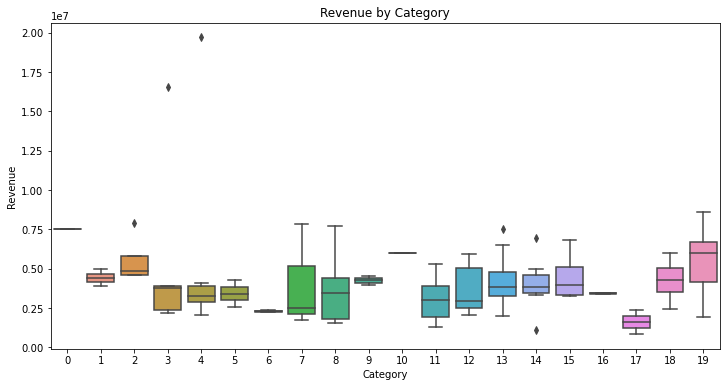

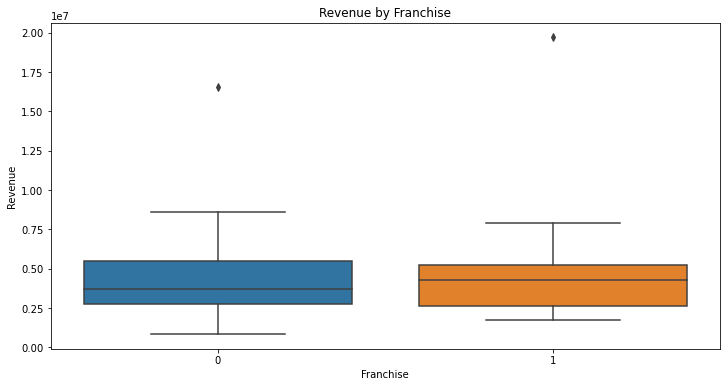

In [10]:
# Boxplot for Revenue by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Revenue', data=df)
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

# Boxplot for Revenue by Franchise
plt.figure(figsize=(12, 6))
sns.boxplot(x='Franchise', y='Revenue', data=df)
plt.title('Revenue by Franchise')
plt.xlabel('Franchise')
plt.ylabel('Revenue')
plt.show()


In [11]:
# Define features and target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Linear Regression

In [12]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_pred

array([6666479.57324262, 5639644.54872308, 3805536.39463166,
       4193324.18078208, 4343130.14047885, 3771286.28284555,
       3975231.17369166, 3538465.19057696, 4008270.62952065,
       6564461.36756485, 5475587.89962776, 3049610.70004873,
       2810473.9006414 , 2279966.85189423, 3582880.67553956,
       4520150.55828419, 5132586.00030909, 1439624.56657968,
       1771028.10021913, 2139029.64016056])

In [13]:
# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 199243202309.41406
R-squared: 0.8639287715046501


# Random Forest Regressor

In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([5038045.96, 5643163.66, 4150491.01, 3714966.08, 4184226.58,
       3452152.2 , 4105558.28, 3587293.68, 3495072.47, 4937221.57,
       5398805.36, 3112121.93, 3213497.69, 2553150.31, 3037272.5 ,
       4675660.57, 5843793.54, 1434340.06, 1773214.84, 2161563.  ])

In [15]:
# Linear Regression
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
print('Linear Regression - Mean Squared Error:', mse_linear)
print('Linear Regression - R-squared:', r2_linear)

# Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest Regression - Mean Squared Error:', mse_rf)
print('Random Forest Regression - R-squared:', r2_rf)


Linear Regression - Mean Squared Error: 199243202309.41406
Linear Regression - R-squared: 0.8639287715046501
Random Forest Regression - Mean Squared Error: 299356063155.39246
Random Forest Regression - R-squared: 0.795557656176252


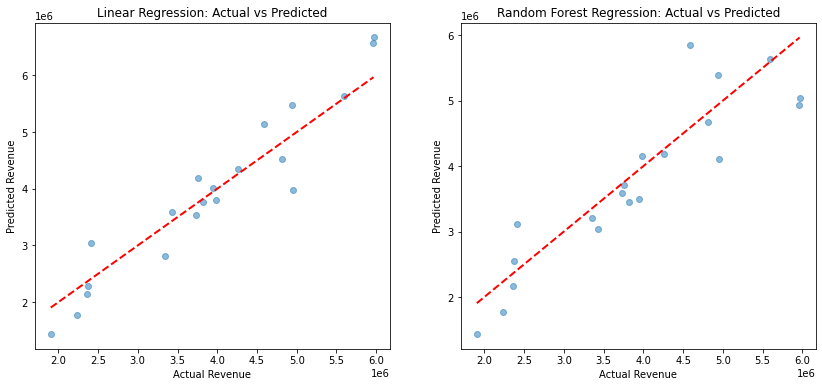

In [16]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

plt.show()
